# Diffusion model

In [1]:
import torch
import torch.utils.data
from torch import nn, optim
from torch.nn import functional as F
import pathlib
from pathlib import Path

from torchvision import datasets, transforms
from torchvision.transforms import Compose, ToTensor, Lambda
from torchvision.utils import save_image
import pytorch_lightning as pl

import matplotlib.pyplot as plt
import numpy as np

from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping, TQDMProgressBar, LearningRateMonitor

import pmldiku
from pmldiku import data, model_utils, diffusion, diffusion_utils

from typing import Any

%load_ext autoreload
%autoreload 1
%aimport pmldiku.data, pmldiku.diffusion, pmldiku.diffusion_utils

In [ ]:
torch.manual_seed(1)

cuda = True
batch_size = 128
epochs = 20
device_name = "cuda" if cuda else "cpu"
unet = False

device = torch.device(device_name)
kwargs = {'num_workers': 4, 'pin_memory': device} 

n_steps, min_beta, max_beta = 1000, 10 ** -4, 0.02  # Originally used by the authors
config = diffusion.ParamConfig(n_steps, min_beta, max_beta)

code_path = Path(os.getcwd()).parent.parent

In [ ]:
transform = Compose([
    ToTensor(),
    Lambda(lambda x: (x - 0.5) * 2)]
)

loader = data.load_mnist(train=True, trans=transform).setup_data_loader(batch_size=batch_size, **kwargs)

In [ ]:
# Construct model from params

network = diffusion.UNet if unet else diffusion.ConvNet  

model = diffusion.LightningDiffusion(
    config=config, network = network, verbose=True
)

In [ ]:
cb_model_checkpoint, cb_early_stopping, cb_progress_bar, cb_loss, cb_lr_monitor = (
    ModelCheckpoint(), EarlyStopping('mse_metric'), 
    TQDMProgressBar(), diffusion_utils.DiffusionLossCallback(), LearningRateMonitor('step'))  

callbacks = [cb_model_checkpoint, cb_early_stopping, cb_progress_bar, cb_loss, cb_lr_monitor]

trainer = pl.Trainer(max_epochs=epochs, devices=1, accelerator=device_name, callbacks=callbacks, auto_lr_find=True)
trainer.fit(model=model, train_dataloaders=loader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]

  | Name             | Type            | Params
-----------------------------------------------------
0 | diffusion_params | DiffusionParams | 0     
1 | network          | ConvNet         | 229 K 
2 | diffusion        | Diffusion       | 229 K 
-----------------------------------------------------
129 K     Trainable params
100 K     Non-trainable params
229 K     Total params
0.918     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Setting diffusion params to: cuda:0
New Epoch. Loss: 0.19009658694267273
New Epoch. Loss: 0.1542534977197647
New Epoch. Loss: 0.13551992177963257
New Epoch. Loss: 0.12166097015142441
New Epoch. Loss: 0.11176026612520218
New Epoch. Loss: 0.11054124683141708
New Epoch. Loss: 0.08107560127973557
New Epoch. Loss: 0.08061560988426208
New Epoch. Loss: 0.07788752764463425
New Epoch. Loss: 0.07182654738426208
New Epoch. Loss: 0.07081236690282822
New Epoch. Loss: 0.07068338245153427
New Epoch. Loss: 0.06716323643922806
New Epoch. Loss: 0.06964147090911865
New Epoch. Loss: 0.0674118772149086
New Epoch. Loss: 0.06558474898338318
New Epoch. Loss: 0.06500651687383652
New Epoch. Loss: 0.06259021162986755
New Epoch. Loss: 0.06291269510984421
New Epoch. Loss: 0.06300437450408936


`Trainer.fit` stopped: `max_epochs=20` reached.


## Plot

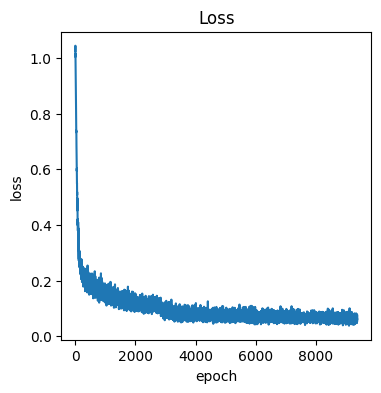

In [ ]:
losses = np.array(cb_loss.train_loss)
model_utils.plot_loss(losses)



In [ ]:

ims = model.to(device).generate(10000)

lars
t = 950
t = 900
t = 850
t = 800
t = 750
t = 700
t = 650
t = 600
t = 550
t = 500
t = 450
t = 400
t = 350
t = 300
t = 250
t = 200
t = 150
t = 100
t = 50
t = 0


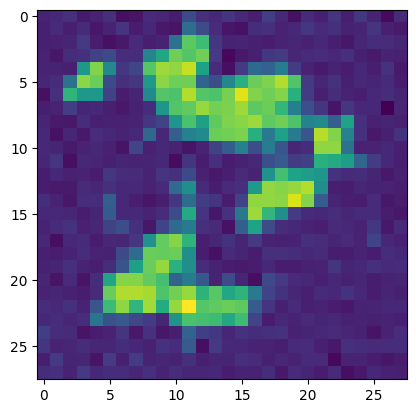

In [ ]:
plt.imshow(ims[4].detach().cpu().squeeze().numpy())

In [ ]:
p = os.getcwd()
tensor_path = pathlib.Path(p).parent.parent / pathlib.Path('output/image-tensors') 

standardized_ims = ((ims - ims.mean()) / ims.std()).cpu()

model_utils.save_image_tensor(standardized_ims, tensor_path, 'convnet_diffusion.pkl')

NameError: name 'pathlib' is not defined

In [ ]:
fig = model_utils.plot_image_reconstruction(standardized_ims[0:9].cpu().detach().numpy().reshape(9, 28, 28), num_cols=3, slim=0, title='ConvNet diffusion', multi_title=False)

figs_path = code_path / Path('figs')
output_utils.save_fig(fig, figs_path, 'convnet-reconstruction')